# Принятие бизнес решений

**Цель:**
Приоритизировать гипотезы методами ICE и RICE, а также провести A/B-тест и проанализировать результаты.

**Задачи:**
- Часть 1
    1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
    3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.
- Часть 2
    1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
    2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
    3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
    4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
    5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
    6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
    7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
    8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
    9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
    10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
    11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
    12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
    13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
    14. Примите решение по результатам теста и объясните его. Варианты решений:
        1. Остановить тест, зафиксировать победу одной из групп.
        2. Остановить тест, зафиксировать отсутствие различий между группами.
        3. Продолжить тест.

**План:**
1. Загрузка и подготовка данных к анализу.
2. Приоритизация гипотез.
3. Анализ A/B-теста.
4. Общий вывод.

### Загружаем данные и подготавливаем их к анализу

In [1]:
# Импортируем все нужные библиотеки.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
# снимаем ограничение на количество столбцов
pd.set_option('display.max_columns', None)

# снимаем ограничение на ширину столбцов
pd.set_option('display.max_colwidth', None)

# выставляем ограничение на показ знаков после запятой
pd.options.display.float_format = '{:,.3f}'.format

In [3]:
# Загружаем нужные датафреймы.
try:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    hypothesis = pd.read_csv('https://code.s3.yandex.net/datasets/hypothesis.csv')
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')
    visitors = pd.read_csv('https://code.s3.yandex.net/datasets/visitors.csv')

In [4]:
# Выводим первые 5 строк таблиц.
display(hypothesis.head())
display(orders.head())
display(visitors.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [5]:
# Изучим информацию о полных дубликатах.
print('Дубликаты в файлах "hypothesis" :', hypothesis.duplicated().sum())
print('Дубликаты в файлах "orders" :', orders.duplicated().sum())
print('Дубликаты в файлах "visitors" :', visitors.duplicated().sum())

Дубликаты в файлах "hypothesis" : 0
Дубликаты в файлах "orders" : 0
Дубликаты в файлах "visitors" : 0


In [6]:
# Изучим информацию о пропусках в каждом поле.
display(hypothesis.isna().sum())
display(orders.isna().sum())
display(visitors.isna().sum())

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

date        0
group       0
visitors    0
dtype: int64

In [7]:
# Поверяем информацию о датафреймах.
display(hypothesis.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

In [8]:
# Приводим все загаловки столбцов к нижнему регистру
hypothesis.columns = hypothesis.columns.str.lower()
orders.columns = orders.columns.str.lower()
visitors.columns = visitors.columns.str.lower()

In [9]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d')

In [10]:
# Поверяем информацию о датафреймах.
display(hypothesis.info())
display(orders.info())
display(visitors.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hypothesis  9 non-null      object
 1   reach       9 non-null      int64 
 2   impact      9 non-null      int64 
 3   confidence  9 non-null      int64 
 4   efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 492.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionid  1197 non-null   int64         
 1   visitorid      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


None

In [11]:
# посмотрим количество групп.
print('Всего групп',visitors['group'].nunique(),':',visitors['group'].unique())

Всего групп 2 : ['A' 'B']


In [12]:
# посмотрим количество пользователей каждой группы
orders.groupby(by='group', as_index=False).agg({'visitorid':'nunique'})

,group,visitorid
0,A,503
1,B,586


In [13]:
# узнаем сколько человек попали в обе группы.
duplicated_users = orders.groupby(by='visitorid').agg({'group' : ['nunique', 'unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups > 1')
len(duplicated_users)

58

**Вывод:**
- Заменили тип данных колонок на соответствующий.
- Переписали названия столбцов.
- Нашли 0 пропусков и дубликатов в датафреймах.
- Выявили 58 пользователей, которые попали в обе группы А/В теста

### Приоритизация гипотез

1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

In [14]:
display(hypothesis)

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


#### приоритизация гипотез методом ICE

In [15]:
# создадим колонки ICE с результатами расчета фреймворка
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000


#### приоритизация гипотез методом RICE

In [16]:
# создадим колонки RICE с результатами расчета фреймворка
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

display(hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.000
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.000


#### Объяснение изменений приоритезации гипотез при применении RICE вместо ICE

По методу ICE приоритетными стали гипотезы № 8, 0, 7, а по RICE гипотезы № 7, 2, 0. Все поменялось потому, что параметр Reach, который отвечает за охват аудитории, оказался выше у лидирующих гипотез (по фреймворку RICE), а метод ICE не учитывает этот параметр.
Также рекомедую тестировать гипотезу под номером 7, так как ее оценка в 2 раза прев

#### Вывод

- Используя метод ICE на первое место встала гипотеза №8: Запустить акцию, дающую скидку на товар в день рождения.
- Используя метод RICE на первое место встала гипотеза №7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- По методу ICE приоритетными стали гипотезы № 8, 0, 7, а по RICE гипотезы № 7, 2, 0. Все поменялось потому, что параметр Reach, который отвечает за охват аудитории, оказался выше у лидирующих гипотез (по фреймворку RICE), а метод ICE не учитывает этот параметр.

**Вывод**

### Анализ A/B-теста

1. Постройте график кумулятивной выручки по группам. Сделайте выводы и предположения.
2. Постройте график кумулятивного среднего чека по группам. Сделайте выводы и предположения.
3. Постройте график относительного изменения кумулятивного среднего чека группы B к группе A. Сделайте выводы и предположения.
4. Постройте график кумулятивного среднего количества заказов на посетителя по группам. Сделайте выводы и предположения.
5. Постройте график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделайте выводы и предположения.
6. Постройте точечный график количества заказов по пользователям. Сделайте выводы и предположения.
7. Посчитайте 95-й и 99-й перцентили количества заказов на пользователя. Выберите границу для определения аномальных пользователей.
8. Постройте точечный график стоимостей заказов. Сделайте выводы и предположения.
9. Посчитайте 95-й и 99-й перцентили стоимости заказов. Выберите границу для определения аномальных заказов.
10. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделайте выводы и предположения.
11. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделайте выводы и предположения.
12. Посчитайте статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделайте выводы и предположения.
13. Посчитайте статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделайте выводы и предположения.
14. Примите решение по результатам теста и объясните его. Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

Для того чтобы построить графики создадим датафрейм `cumulative_data`, в который будим собирать кумулятивные данные

In [17]:
# создадим массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates()

# получим агрегированные кумулятивные по дням данные о заказах 
orders_aggregated = (dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                 .agg({'date': 'max', 'group': 'max', 'visitorid': 'nunique', 'transactionid': 'nunique', 'revenue': 'sum'}), axis=1)
                                 .sort_values(by=['date','group']))

# получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
visitors_aggregated = (dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                   .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)
                                   .sort_values(by=['date','group']))

# объединим кумулятивные данные в одной таблице и присв ее столбцам понятные названия
cumulative_data = orders_aggregated.merge(visitors_aggregated, on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors'] 

display(cumulative_data.head(10))

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,20,24,148579,719
1,2019-08-01,B,20,21,101217,713
2,2019-08-02,A,38,44,242401,1338
3,2019-08-02,B,43,45,266748,1294
4,2019-08-03,A,62,68,354874,1845
5,2019-08-03,B,59,61,380996,1803
6,2019-08-04,A,77,84,425699,2562
7,2019-08-04,B,75,78,489567,2573
8,2019-08-05,A,100,109,549917,3318
9,2019-08-05,B,98,101,581995,3280


Также проверим минимальные и максимальные значения даты

In [18]:
# проверим минимальные значения даты
print(orders['date'].min())
print(visitors['date'].min())
print(cumulative_data['date'].min())

2019-08-01 00:00:00
2019-08-01 00:00:00
2019-08-01 00:00:00


In [19]:
# проверим максимальные значения даты
print(orders['date'].max())
print(visitors['date'].max())
print(cumulative_data['date'].max())

2019-08-31 00:00:00
2019-08-31 00:00:00
2019-08-31 00:00:00


In [20]:
alpha = 0.05#

results = st.mannwhitneyu(visitors[visitors['group']=='A']['visitors'], visitors[visitors['group']=='B']['visitors'])

print('p-значение: ', results.pvalue)
if results.pvalue < alpha:
    print('Разница в количестве посетителей групп A и B статистически значительна\n')
else:
    print('Разница в количестве посетителей групп A и B статистически не значительна\n')

p-значение:  0.7301376549390499
Разница в количестве посетителей групп A и B статистически не значительна



#### Построение графика кумулятивной выручки по группам

In [21]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

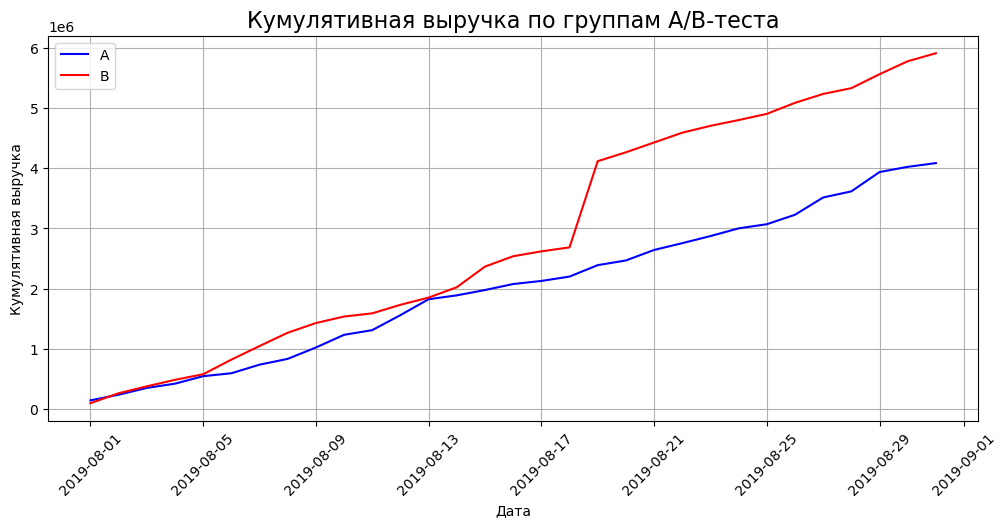

In [22]:
# Строим график выручки группы А
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='А', color='blue')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B', color='red')

plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.title('Кумулятивная выручка по группам A/B-теста', fontsize=16)
plt.legend()
plt.grid()
plt.show()

- На проятжении всего рассматриваемого периода в обеих группах прибыль растет. Однако прибыль группы B растет быстрее группы А.
- Также мозно заметить резкии всплески выручки в группе B. Этот скачок может быть связан с большим числом заказов или же с дорогими заказами.

#### Построение графика кумулятивного среднего чека по группам

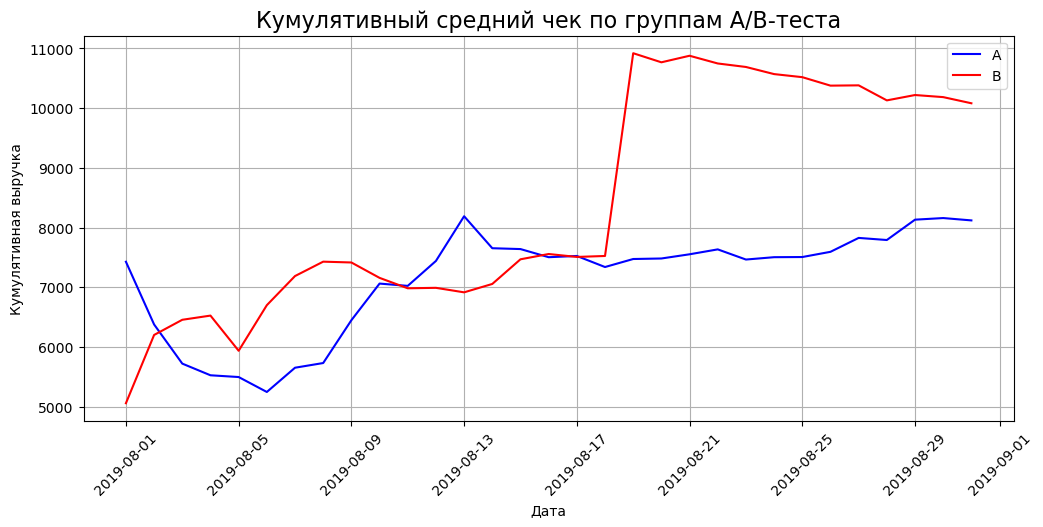

In [23]:
# Строим график выручки группы А
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)

plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'],
         label='А', color='blue')

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'],
         label='B', color='red')

plt.ylabel('Кумулятивная выручка')
plt.xlabel('Дата')
plt.title('Кумулятивный средний чек по группам A/B-теста', fontsize=16)
plt.legend()
plt.grid()
plt.show()

- На этом графике скачок в группе B еще более резкий. После него наблюдаеся падение размера среднего чека, а в группе A заметин рост.
- Необходимо больше данных для того, чтобы график среднего чека пришел к реальному значению.

#### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

In [24]:
cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, on='date', suffixes=['A', 'B'])

cumulative_revenue.sample(3)

,date,revenueA,ordersA,revenueB,ordersB
15,2019-08-16,2078908,277,2539635,336
12,2019-08-13,1826511,223,1853738,268
9,2019-08-10,1236098,175,1539203,215


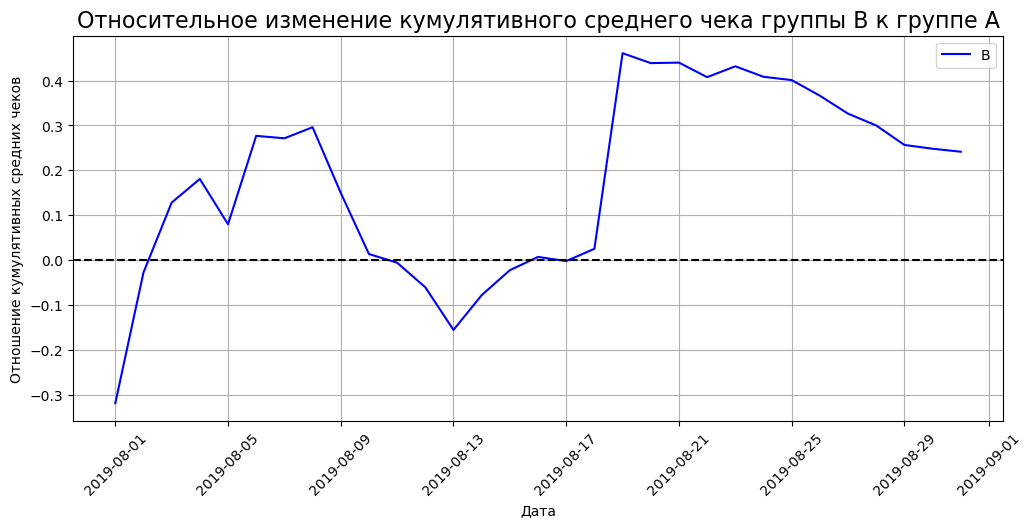

In [25]:
plt.figure(figsize=(12, 5))
plt.xticks(rotation=45)

# cтроим отношение средних чеков
plt.plot(cumulative_revenue['date'], (cumulative_revenue['revenueB']/cumulative_revenue['ordersB'])/
                                     (cumulative_revenue['revenueA']/cumulative_revenue['ordersA'])-1,
         label='B', color='blue')

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.ylabel('Отношение кумулятивных средних чеков')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A', fontsize=16)
plt.legend()
plt.grid()
plt.show()

- На этом графике видно падение выручки в группе B отно сительно группы A.
- В дальнейшем средний чек группы B показал стабильное падение, а чек группы А рост.

#### Построение графика кумулятивного среднего количества заказов на посетителя по группам

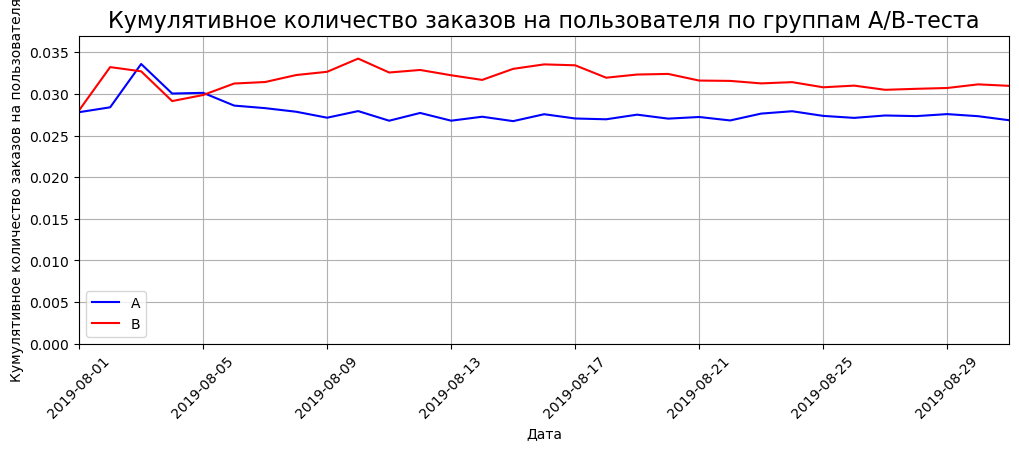

In [26]:
# создаем новую колонку с расчетом кумулятивой конверсии
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(12, 4))
plt.xticks(rotation=45)

plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A', color='blue')
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B', color='red')

# задаем масштаб осей
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-08-31'), 0, 0.037])

plt.ylabel('Кумулятивное количество заказов на пользователя')
plt.xlabel('Дата')
plt.title('Кумулятивное количество заказов на пользователя по группам A/B-теста', fontsize=16)
plt.legend()
plt.grid()
plt.show()

Динамика стабилизировалась с 10 августа. Небольшое преимущество за группой В.

#### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителей группы B к группе A

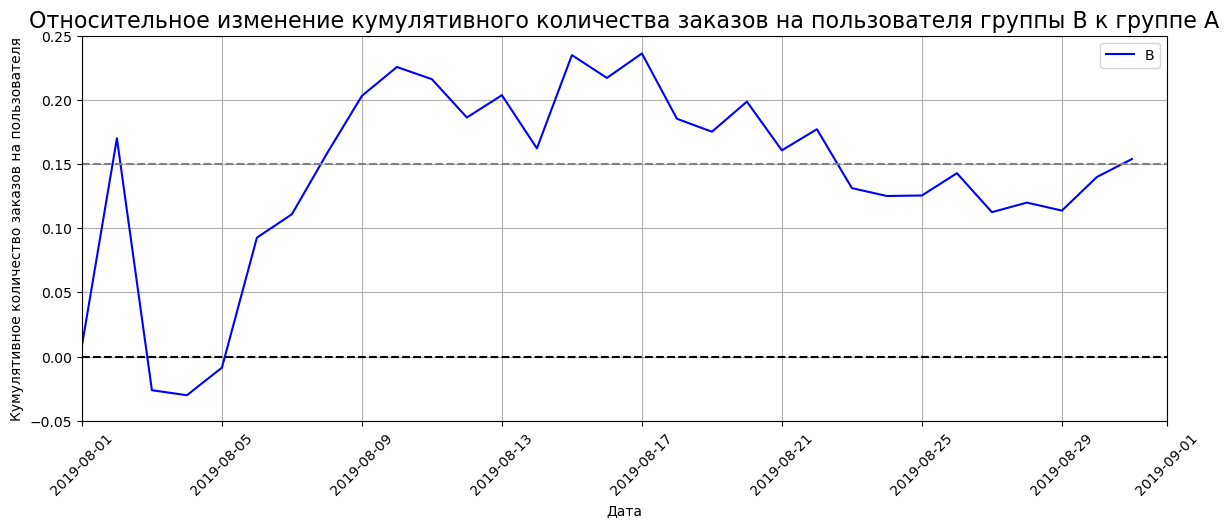

In [27]:
cumulative_conversions = (cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']],
                                                                         on='date', suffixes=['A', 'B']))

plt.figure(figsize=(14, 5))
plt.xticks(rotation=45)

plt.plot(cumulative_conversions['date'], 
         cumulative_conversions['conversionB']/cumulative_conversions['conversionA']-1, label='В', color='blue')
plt.ylabel('Кумулятивное количество заказов на пользователя')
plt.xlabel('Дата')
plt.title('Относительное изменение кумулятивного количества заказов на пользователя группы B к группе A', fontsize=16)
plt.legend()

plt.axhline(y=0.15, color='gray', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.axis([pd.to_datetime("2019-08-01"), pd.to_datetime('2019-09-01'), -0.05, 0.25])
plt.grid()
plt.show()

- Количество заказов на пользователя в группе В обогнало группу А на 20-24% к середине августа, затем, после постепенного снижения, привысило на 10-15% в последний период.
- Метрика лучше в группе В практически на всем рассматриваемом периоде, кроме первых 6 дней. К концу периода заметно снижение роста и выход на плато.

#### Построение точечного графика количества заказов по пользователям

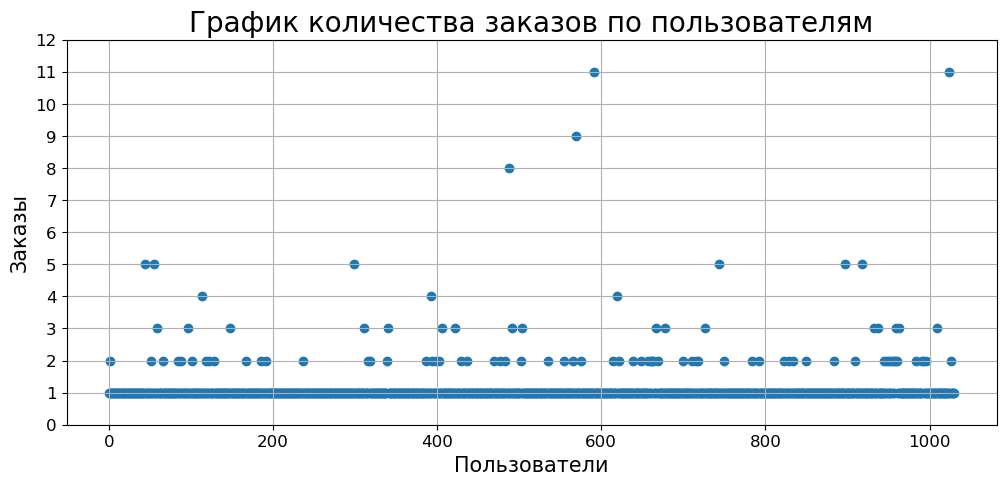

In [28]:
# подсчитаем количество заказов каждого пользователям 
orders_agg = (orders
              .groupby(by=['visitorid'])
              .agg({'transactionid': 'count'})
              .rename(columns={'transactionid': 'orders_cnt'})
              .reset_index()
)

plt.figure(figsize=(12, 5))

# укажем серию из чисел от 0 до количества наблюдений в orders_agg
x_values = pd.Series(range(0, len(orders_agg['orders_cnt'])))
plt.scatter(x_values, orders_agg['orders_cnt'])

# построим точечный график количества заказов по пользователям
plt.title('График количества заказов по пользователям', fontsize=20)
plt.ylabel('Заказы', fontsize=15)
plt.xlabel('Пользователи', fontsize=15)

plt.xticks(fontsize=12)
plt.yticks(np.arange(min(orders_agg['orders_cnt'])-1, max(orders_agg['orders_cnt'])+2, 1))
plt.yticks(fontsize=12)
plt.grid()
plt.show()

- Как и предполагалось в количестве заказов есть аномальные значения. Было по 8, 9 и 11 заказоб, но подавляющая часть делала по 1-2 заказ.

#### Подсчет 95-ого и 99-ого перцентилей количества заказов на пользователя

In [29]:
percent = np.percentile(orders_agg['orders_cnt'], [95, 99])
print('95-й прецентиль количества заказов на пользователя: ', percent[0])
print('99-й прецентиль количества заказов на пользователя: ', percent[1])

95-й прецентиль количества заказов на пользователя:  2.0
99-й прецентиль количества заказов на пользователя:  4.0


- Возьмем за опорную границу 3 заказа. Будем отсекать значения количества заказов больше 2.

#### Построение точечного графика стоимостей заказов

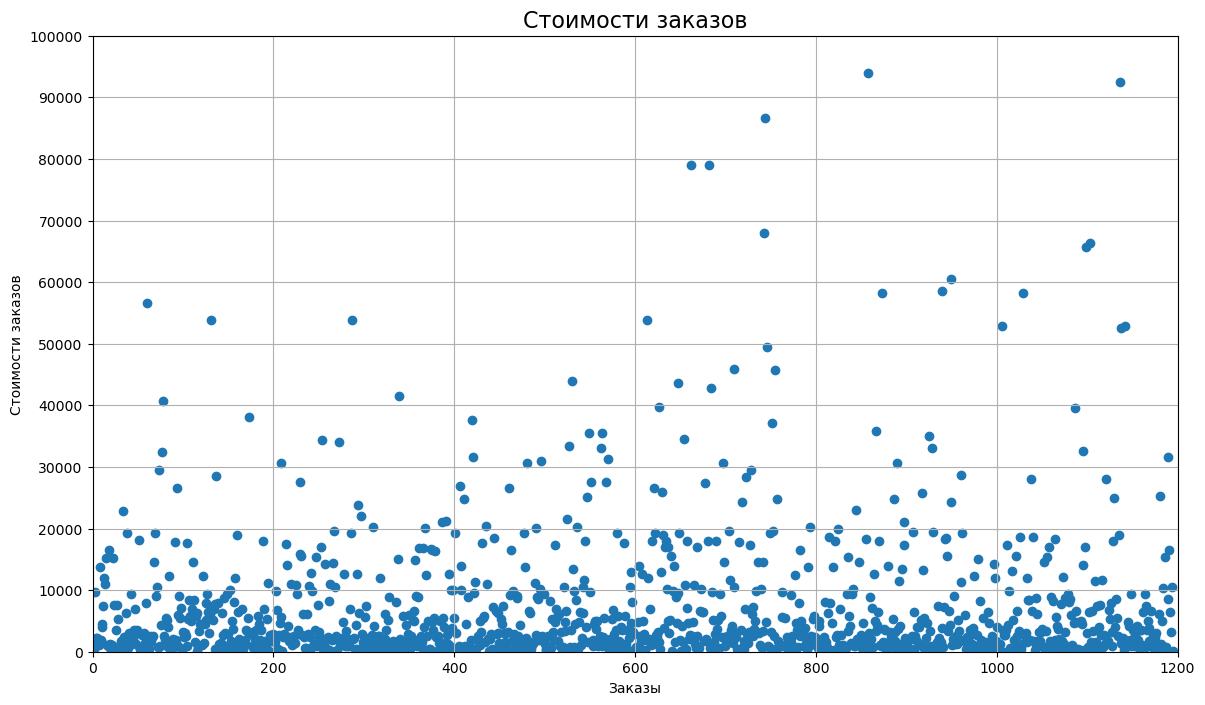

count       1,197.000
mean        8,348.006
std        39,191.132
min            50.000
25%         1,220.000
50%         2,978.000
75%         8,290.000
max     1,294,500.000
Name: revenue, dtype: float64

In [30]:
# серия из чисел от 0 до количества наблюдений в orders
x_values = pd.Series(range(0,len(orders)))

# построим точечный график стоимостей заказов
plt.figure(figsize=(14, 8))
plt.scatter(x_values, orders['revenue'])
plt.xlabel('Заказы')
plt.ylabel('Стоимости заказов')
plt.title('Cтоимости заказов', fontsize=16)
plt.yticks(np.arange(0, max(orders['revenue']), 10000))
plt.axis([0, 1200, 0, 100000])
plt.grid()
plt.show()
orders['revenue'].describe()

- Большая часть заказов стоит меньше 10 000. Есть и аномальные заказы, такие как за 1 294 500. Они искажают средние значения.


#### Посчет 95-ого и 99-ого перцентилей стоимости заказов

In [31]:
percent = np.percentile(orders['revenue'], [95, 99])
print('95-й перцентиль стоимости заказов: {:.0f}'.format(percent[0]))
print('99-й перцентиль стоимости заказов: {:.0f}'.format(percent[1]))

95-й перцентиль стоимости заказов: 28000
99-й перцентиль стоимости заказов: 58233


- 95% заказов меньше 28 000. 
- Поэтому заказы дороже 28 000 будем считать аномальными.

#### Создание датафрейма с «сырыми» данными.

In [32]:
# количество пользователей в выбранную дату в группе A
visitors_a_daily = visitors[visitors['group']=='A'][['date', 'visitors']]
visitors_a_daily.columns = ['date', 'visitors_per_date_a']

# количество пользователей до выбранной даты включительно в группе A
visitors_a_cummulative = visitors_a_daily.apply(lambda x: visitors_a_daily[visitors_a_daily['date'] <=x['date']]
                                                .agg({'date' : 'max', 'visitors_per_date_a' : 'sum'}), axis=1)
visitors_a_cummulative.columns = ['date', 'visitors_cummulative_a']

# количество пользователей в выбранную дату в группе B
visitors_b_daily = visitors[visitors['group']=='B'][['date', 'visitors']]
visitors_b_daily.columns = ['date', 'visitors_per_date_b']

# количество пользователей до выбранной даты включительно в группе В
visitors_b_cummulative = visitors_b_daily.apply(lambda x: visitors_b_daily[visitors_b_daily['date'] <=x['date']]\
                                     .agg({'date' : 'max', 'visitors_per_date_b' : 'sum'}), axis=1)
visitors_b_cummulative.columns = ['date', 'visitors_cummulative_b']

# количество заказов и суммарная выручка в выбранную дату в группе A
orders_a_daily = (orders[orders['group']=='A'][['date', 'transactionid', 'visitorid', 'revenue']]
                  .groupby('date', as_index=False)
                  .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'}))
orders_a_daily.columns = ['date', 'orders_per_date_a', 'revenue_per_date_a']

# суммарное число заказов и суммарная выручка до выбранной даты включительно в группе A
orders_a_cummulative = (orders_a_daily.apply(lambda x: orders_a_daily[orders_a_daily['date'] <= x['date']]
                                      .agg({'date' : 'max', 'orders_per_date_a' : 'sum', 'revenue_per_date_a' : 'sum'}), axis=1)
                                      .sort_values(by=['date']))
orders_a_cummulative.columns = ['date', 'orders_cummulative_a', 'revenue_cummulative_a']

# количество заказов и суммарная выручка в выбранную дату в группе B
orders_b_daily = (orders[orders['group']=='B'][['date', 'transactionid', 'visitorid', 'revenue']]
                  .groupby('date', as_index=False)
                  .agg({'transactionid' : pd.Series.nunique, 'revenue' : 'sum'}))
orders_b_daily.columns = ['date', 'orders_per_date_b', 'revenue_per_date_b']

# объединение в один датафрейм data
data = (orders_a_daily.merge(orders_b_daily, on='date', how='left')
        .merge(visitors_a_daily, on='date', how='left')
        .merge(visitors_b_daily, on='date', how='left')
        .merge(visitors_a_cummulative, on='date', how='left')
        .merge(visitors_b_cummulative, on='date', how='left'))

data.head(3)

,date,orders_per_date_a,revenue_per_date_a,orders_per_date_b,revenue_per_date_b,visitors_per_date_a,visitors_per_date_b,visitors_cummulative_a,visitors_cummulative_b
0,2019-08-01,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,507,509,1845,1803


In [33]:
# создадим переменные orders_by_users_a и orders_by_users_b со столбцами ['visitorid', 'transactionid']
# в них для каждого пользователя, который сделал хотя бы 1 заказ будет указано количество совершённых заказов
orders_by_users_a = orders[orders['group']=='A'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
orders_by_users_a.columns = ['visitorid', 'transactionid']

orders_by_users_b = orders[orders['group']=='B'].groupby('visitorid', as_index=False).agg({'transactionid' : pd.Series.nunique})
orders_by_users_b.columns = ['visitorid', 'transactionid']

# объявим переменные sample_a и sample_b, в которых пользователям из каждой группы А/В теста 
# будет соответствовать количество совершённых заказов 
# тем, кто ничего не заказал, будут соответствовать нули
sample_a = pd.concat([orders_by_users_a['transactionid'],pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum()
                                                                                      - len(orders_by_users_a['transactionid'])), name='orders')],axis=0)
sample_b = pd.concat([orders_by_users_b['transactionid'],pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum()
                                                                                      - len(orders_by_users_b['transactionid'])), name='orders')],axis=0)

#### Посчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем статистические гипотезы:

**H0** — Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет.

**H1** — Среднем количество заказов на посетителя групп A и B различны, статистически значимые отличия есть.

Применим статистический критерий Манна-Уитни к полученным выборкам.

In [34]:
# критический уровень статистической значимости зададим 5% 
alpha = .05 

# передадим критерию mannwhitneyu() данные
pvalue = st.mannwhitneyu(sample_a, sample_b)[1]

print('p-value:',"{0:.3f}".format(st.mannwhitneyu(sample_a, sample_b)[1]))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')


print('Относительный прирост группы В к группе А >= уровня значимости:',"{0:.3f}".format(sample_b.mean() / sample_a.mean() - 1))

p-value: 0.017
Отвергаем нулевую гипотезу.
Относительный прирост группы В к группе А >= уровня значимости: 0.138


1. "Сырые" данные говорят о том, что в среднем количестве заказов между группами есть статистически значимые различия. 
2. Прирост среднего группы В к группе А равен 13.8%

#### Посчет статистичесой значимости различий в среднем чеке заказа между группами по «сырым» данным

Сформулируем статистические гипотезы:

**H0** — средний чек в группе А и группе В одинаковый.

**H1** — средний чек в группе А и группе В различается.

Применим статистический критерий Уилкоксона-Манна-Уитни.

In [35]:
# передадим критерию mannwhitneyu() данные
pvalue = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]

print("p-value: {0:.3f}".format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')
    
# относительное различие в конверсии между группами
print('Относительный прирост группы В к группе А >= уровня значимости: {0:.3f}'
      .format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Не получилось отвергнуть нулевую гипотезу.
Относительный прирост группы В к группе А >= уровня значимости: 0.259


1. "Сырые" данные говорят о том, что средний чек в группах А/В одинаковый
2. Прирост среднего чека группы B по отношению к группе A равен 25,9%.

####  Создание датафрейма с «очищенными» данными.

In [36]:
# сделаем срез пользователей, совершивших заказы дороже 28 000 
users_many_orders = pd.concat([orders_by_users_a[orders_by_users_a['transactionid'] > orders_by_users_a['transactionid'].quantile(0.95)]['visitorid'],
                               orders_by_users_b[orders_by_users_b['transactionid'] > orders_by_users_b['transactionid'].quantile(0.95)]['visitorid']],
                              axis = 0)

# сделаем срезы пользователей с числом заказов больше 2
users_expensive_orders = orders[orders['revenue'] > orders['revenue'].quantile(0.95)]['visitorid']

# объединим их в таблице abnormal_date
abnormal_date = pd.concat([users_many_orders, users_expensive_orders], axis=0).drop_duplicates().sort_values()

# сколько всего аномальных пользователей
print('Всего аномальных пользователей: {}'.format(len(abnormal_date))) 

Всего аномальных пользователей: 74


In [37]:
# Подготовим выборки
sample_a_filtered = pd.concat([orders_by_users_a[np.logical_not(orders_by_users_a['visitorid']
                                                           .isin(abnormal_date))]['transactionid'], 
                               pd.Series(0, index=np.arange(data['visitors_per_date_a'].sum() 
                                                            - len(orders_by_users_a['transactionid'])), name='orders')],axis=0)

sample_b_filtered = pd.concat([orders_by_users_b[np.logical_not(orders_by_users_b['visitorid']
                                                                .isin(abnormal_date))]['transactionid'],
                               pd.Series(0, index=np.arange(data['visitors_per_date_b'].sum()
                                                            - len(orders_by_users_b['transactionid'])), name='orders')],axis=0)

#### Посчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сформулируем статистические гипотезы:

**H0** — Среднее количество заказов на посетителя групп A и B равны, статистически значимых отличий нет.

**H1** — Среднем количество заказов на посетителя групп A и B различны, статистически значимые отличия есть.

Применим статистический критерий Уилкоксона-Манна-Уитни.

In [38]:
# передадим критерию mannwhitneyu() данные
pvalue = st.mannwhitneyu(sample_a_filtered, sample_b_filtered)[1]

print('p-value:',"{0:.3f}".format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')


print('Относительный прирост группы В к группе А >= уровня значимости:',"{0:.3f}".format(sample_b_filtered.mean() / sample_a_filtered.mean() - 1))

p-value: 0.013
Отвергаем нулевую гипотезу.
Относительный прирост группы В к группе А >= уровня значимости: 0.173


- Среднем количество заказов на посетителя групп A и B различны, статистически значимые отличия есть.
- Прирост группы В к группе А увеличился с 13.8% до 17.3%

#### Посчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным

Сформулируем статистические гипотезы:

**H0** — средний чек в группе А и группе В одинаковый.

**H1** — средний чек в группе А и группе В различается.

Применим статистический критерий Уилкоксона-Манна-Уитни.

In [39]:
pvalue = st.mannwhitneyu(orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormal_date)))]['revenue'], 
                         orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorid'].isin(abnormal_date)))]['revenue'])[1]

print('p-value:',"{0:.3f}".format(pvalue))

if pvalue < alpha:
    print('Отвергаем нулевую гипотезу.')
else:
    print('Не получилось отвергнуть нулевую гипотезу.')


print('Относительный прирост группы В к группе А >= уровня значимости:',"{0:.3f}"
      .format(orders[np.logical_and(orders['group']=='B', np.logical_not(
                 orders['visitorid'].isin(abnormal_date)))]['revenue'].mean()/orders[np.logical_and(
                    orders['group']=='A', np.logical_not(orders['visitorid'].isin(abnormal_date)))]['revenue'].mean() - 1))

p-value: 0.738
Не получилось отвергнуть нулевую гипотезу.
Относительный прирост группы В к группе А >= уровня значимости: -0.020


- Статистической разницы между "очищенными" и "сырыми" данными нет.
- Относительный прирост группы В к группе А уменьшился с 25.9% до -2%

### Общий вывод

**1.Загрузка и подготовка данных к анализу.:**
- Заменили тип данных колонок на соответствующий.
- Переписали названия столбцов.
- Нашли 0 пропусков и дубликатов в датафреймах.
- Выявили 58 пользователей, которые попали в обе группы А/В теста

**2.Приоритизация гипотез:**
- Используя метод ICE на первое место встала гипотеза №8: Запустить акцию, дающую скидку на товар в день рождения.
- Используя метод ICE на первое место встала гипотеза №7: Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.
- По методу ICE приоритетными стали гипотезы № 8, 0, 7, а по RICE гипотезы № 7, 2, 0. Все поменялось потому, что параметр Reach, который отвечает за охват аудитории, оказался выше у лидирующих гипотез (по фреймворку RICE), а метод ICE не учитывает этот параметр.

**3.Анализ A/B-теста:**
 - По результатам теста двух групп A/B теста было принято решение **остановить тест**, так как среднее количество заказов имеет статистическую значимость. То есть разница получена не случайным образом, а она действительно присутствует. В группе В больше заказов, чем в группе А на 17.3%, поэтому мы можем зафиксировать победу группы В.